In [1]:
from astropy.table import Table
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from astropy.io import ascii


W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'

#---------- high res B6 (before conv) ------------
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

#---------- high res B3 (before conv) ------------

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e2_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'




#catalogdir = '/Users/dbahck37/w51data/alma_imf/catalog/getsf-native/'
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
#---------- local direc  ------------

"""

w51n_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'



w51e_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'


w51n_b6_conv_briggs = '/Users/dbahck37/w51data/convolved_new/w51n_briggs_B6_conv.fits'
w51n_b3_tt0 = '/Users/dbahck37/w51data/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b6_conv_briggs ='/Users/dbahck37/W51data/convolved_new/w51e_briggs_B6_conv.fits'
"""




class catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind]
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]
        
        self.flux = catdata_w51e['FXT_BST0%d'%bandind]
        self.fluxerr = catdata_w51e['FXT_ERR0%d'%bandind]
        self.flux_g = catdata_w51e['FXT_ALT0%d'%bandind]
        self.fooa = catdata_w51e['FOOA0%d'%bandind]
        self.foob = catdata_w51e['FOOB0%d'%bandind]
        

        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
catdata(cat_w51e)


In [7]:
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20

hdrNBalmaimf = fits.getheader(w51n_b3_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf) 
beam_avg_size_b3 = np.sqrt(beamalmaimf.major.value*beamalmaimf.minor.value)*3600

hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf) 
beam_avg_size_b6 = np.sqrt(beamalmaimf.major.value*beamalmaimf.minor.value)*3600

catdata_w51n = ascii.read(cat_w51n,data_start=0,format='commented_header', header_start=120,  comment="!")
sky_ra = catdata_w51n['WCS_ACOOR']
sky_dec = catdata_w51n['WCS_DCOOR']
pix_x = catdata_w51n['XCO_P']
pix_y = catdata_w51n['YCO_P']

afwhm_b6 = catdata_w51n['AFWHM02']
bfwhm_b6 = catdata_w51n['BFWHM02']

asize_b6 = catdata_w51n['ASIZE02']
bsize_b6 = catdata_w51n['BSIZE02']

theta_b6 = catdata_w51n['THETA02']

afwhm_b3 = catdata_w51n['AFWHM03']
bfwhm_b3 = catdata_w51n['BFWHM03']

asize_b3 = catdata_w51n['ASIZE03']
bsize_b3 = catdata_w51n['BSIZE03']

theta_b3 = catdata_w51n['THETA03']

no = catdata_w51n['NO']

rec_ind_b3 = np.where((np.abs(catdata_w51n['GOODM03'])>1)&
                   (np.abs(catdata_w51n['SIGNM03'])>1)&
                   (catdata_w51n['FXP_BST03']/catdata_w51n['FXP_ERR03']>2)&
                   (catdata_w51n['FXT_BST03']/catdata_w51n['FXT_ERR03']>2)&
                   (catdata_w51n['AFWHM03']/catdata_w51n['BFWHM03']<2)&
                   (catdata_w51n['FOOA03']/catdata_w51n['AFWHM03']>1.15))[0]

rec_ind_b6 = np.where((np.abs(catdata_w51n['GOODM02'])>1)&
                   (np.abs(catdata_w51n['SIGNM02'])>1)&
                   (catdata_w51n['FXP_BST02']/catdata_w51n['FXP_ERR02']>2)&
                   (catdata_w51n['FXT_BST02']/catdata_w51n['FXT_ERR02']>2)&
                   (catdata_w51n['AFWHM02']/catdata_w51n['BFWHM02']<2)&
                   (catdata_w51n['FOOA02']/catdata_w51n['AFWHM02']>1.15))[0]

rec_ind_b62 = np.where((np.abs(catdata_w51n['GOODM01'])>1)&
                   (np.abs(catdata_w51n['SIGNM01'])>1)&
                   (catdata_w51n['FXP_BST01']/catdata_w51n['FXP_ERR01']>2)&
                   (catdata_w51n['FXT_BST01']/catdata_w51n['FXT_ERR01']>2)&
                   (catdata_w51n['AFWHM01']/catdata_w51n['BFWHM01']<2)&
                   (catdata_w51n['FOOA01']/catdata_w51n['AFWHM01']>1.15))[0]
skypos = np.vstack((sky_ra,sky_dec)).T
print(len(rec_ind_b3))
print(len(rec_ind_b6))
print(len(rec_ind_b62))


catdata_w51n = ascii.read(cat_w51e,data_start=0,format='commented_header', header_start=120,  comment="!")
sky_ra = catdata_w51n['WCS_ACOOR']
sky_dec = catdata_w51n['WCS_DCOOR']
pix_x = catdata_w51n['XCO_P']
pix_y = catdata_w51n['YCO_P']

afwhm_b6 = catdata_w51n['AFWHM02']
bfwhm_b6 = catdata_w51n['BFWHM02']

asize_b6 = catdata_w51n['ASIZE02']
bsize_b6 = catdata_w51n['BSIZE02']

theta_b6 = catdata_w51n['THETA02']

afwhm_b3 = catdata_w51n['AFWHM03']
bfwhm_b3 = catdata_w51n['BFWHM03']

asize_b3 = catdata_w51n['ASIZE03']
bsize_b3 = catdata_w51n['BSIZE03']

theta_b3 = catdata_w51n['THETA03']

no = catdata_w51n['NO']

rec_ind_b3 = np.where((np.abs(catdata_w51n['GOODM03'])>1)&
                   (np.abs(catdata_w51n['SIGNM03'])>1)&
                   (catdata_w51n['FXP_BST03']/catdata_w51n['FXP_ERR03']>2)&
                   (catdata_w51n['FXT_BST03']/catdata_w51n['FXT_ERR03']>2)&
                   (catdata_w51n['AFWHM03']/catdata_w51n['BFWHM03']<2)&
                   (catdata_w51n['FOOA03']/catdata_w51n['AFWHM03']>1.15)&
                   (np.sqrt(catdata_w51n['AFWHM03']*catdata_w51n['BFWHM03'])<4*beam_avg_size_b3))[0]

rec_ind_b6 = np.where((np.abs(catdata_w51n['GOODM02'])>1)&
                   (np.abs(catdata_w51n['SIGNM02'])>1)&
                   (catdata_w51n['FXP_BST02']/catdata_w51n['FXP_ERR02']>2)&
                   (catdata_w51n['FXT_BST02']/catdata_w51n['FXT_ERR02']>2)&
                   (catdata_w51n['AFWHM02']/catdata_w51n['BFWHM02']<2)&
                   (catdata_w51n['FOOA02']/catdata_w51n['AFWHM02']>1.15)&
                    (np.sqrt(catdata_w51n['AFWHM02']*catdata_w51n['BFWHM02'])<4*beam_avg_size_b6))[0]

rec_ind_b62 = np.where((np.abs(catdata_w51n['GOODM01'])>1)&
                   (np.abs(catdata_w51n['SIGNM01'])>1)&
                   (catdata_w51n['FXP_BST01']/catdata_w51n['FXP_ERR01']>2)&
                   (catdata_w51n['FXT_BST01']/catdata_w51n['FXT_ERR01']>2)&
                   (catdata_w51n['AFWHM01']/catdata_w51n['BFWHM01']<2)&
                   (catdata_w51n['FOOA01']/catdata_w51n['AFWHM01']>1.15)&
                      (np.sqrt(catdata_w51n['AFWHM01']*catdata_w51n['BFWHM01'])<4*beam_avg_size_b6))[0]
skypos = np.vstack((sky_ra,sky_dec)).T
print(len(rec_ind_b3))
print(len(rec_ind_b6))
print(len(rec_ind_b62))

manualindex =[1,6,3,5,8,68]
manualindex =[0,5,2,4,7,67]
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


25
103
117
20
28
32


In [143]:
from functools import reduce
def count_points_in_ellipse(xcen,ycen,major,minor,pa,xpos,ypos):
    # caclulate foci positions 
    # must be full major, minor not semi major, minor
    fodx = np.cos(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    fody = np.sin(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    
    fox1 = xcen + fodx
    foy1 = ycen + fody
    
    fox2 = xcen - fodx
    foy2 = ycen - fody
    
    dist1 = np.sqrt((xpos-fox1)**2+(ypos-foy1)**2)
    dist2 = np.sqrt((xpos-fox2)**2+(ypos-foy2)**2)
    
    isinside = np.where(dist1+dist2<major)[0]
    
    return len(isinside), list(isinside)


def multiplicity(ax,hdrNB,catdatadir,xysource,isb3=True,beam=None,use_criteria=True, 
                          label=None,color='cyan',lw=2,aperture='fwhm+beam',hatch='/',histcolor='b',
                 legendlabel=None,limitarea=None, return_nonzero_ind=False, maxrad=1e3,alpha=1):
    catdata = ascii.read(catdatadir,data_start=0,format='commented_header', header_start=120,  comment="!")
    sky_ra = catdata['WCS_ACOOR']
    sky_dec = catdata['WCS_DCOOR']
    no = catdata['NO']
    if isb3:
        bandlabel = '03'
    else:
        bandlabel = '02'
    fooa = catdata['FOOA%s'%bandlabel]
    foob = catdata['FOOB%s'%bandlabel]
    theta = catdata['THETA%s'%bandlabel]
    afwhm = catdata['AFWHM%s'%bandlabel]
    bfwhm = catdata['BFWHM%s'%bandlabel]
    
    ncat = len(no)
   
    if use_criteria:
        rec_ind = np.where((np.abs(catdata['GOODM%s'%bandlabel])>1)&
                   (np.abs(catdata['SIGNM%s'%bandlabel])>1)&
                   (catdata['FXP_BST%s'%bandlabel]/catdata['FXP_ERR%s'%bandlabel]>2)&
                   (catdata['FXT_BST%s'%bandlabel]/catdata['FXT_ERR%s'%bandlabel]>2)&
                   (catdata['AFWHM%s'%bandlabel]/catdata['BFWHM%s'%bandlabel]<2)&
                   (catdata['FOOA%s'%bandlabel]/catdata['AFWHM%s'%bandlabel]>1.15))[0]
    else: 
        rec_ind = np.arange(ncat)
        
    
    if label is None:
        label = np.arange(ncat)
        
    
    if limitarea is not None:
        
        posind = np.where((sky_ra>limitarea[0])&(sky_ra<limitarea[1])&
                          (sky_dec>limitarea[2])&(sky_dec<limitarea[3]))[0]
    else:
        posind = np.arange(ncat)
        
    totalind = reduce(np.intersect1d, (rec_ind, label, posind))  
        
    sky_ra = sky_ra[totalind]
    sky_dec = sky_dec[totalind]
    fooa = fooa[totalind]
    foob = foob[totalind]
    theta = theta[totalind]
    no = no[totalind]
    afwhm =afwhm[totalind]
    bfwhm = bfwhm[totalind]
    
    skypos = np.vstack((sky_ra,sky_dec)).T

    
    wcsNB = WCS(hdrNB,naxis=2)
    scaleNB = wcsNB.proj_plane_pixel_scales()[0]
    beamNB = Beam.from_fits_header(hdrNB)

    xypos = wcsNB.wcs_world2pix(skypos,0)
    xpos = xypos[:,0]
    ypos = xypos[:,1]
      
    numarr=[] ; indarr=[]; indarr2=[] ; highresindarr = [] ; totalindarr=[]
    #print(xysource)
    for i in range(len(xypos)):
        if aperture is 'footprint':
            major = fooa[i]/3600/scaleNB.value
            minor = foob[i]/3600/scaleNB.value
            pa = 180-theta[i]
        elif aperture is 'fwhm+beam':
            meanbeamsize = (beam.major.value+beam.minor.value)/4
            major = (afwhm[i]/3600+meanbeamsize)/scaleNB.value
            minor = (bfwhm[i]/3600+meanbeamsize)/scaleNB.value
            pa = 180-theta[i]
        elif aperture is 'beam':
            major = beam.major.value/scaleNB.value
            minor = beam.minor.value/scaleNB.value
            pa = 180-beam.pa.value
        if major > maxrad:
            continue
        
        numsource, indsource = count_points_in_ellipse(xpos[i],ypos[i],major,minor,180-pa,xysource[:,0],xysource[:,1])
        print(no[i],xpos[i],ypos[i],major, minor,pa,numsource)

        numarr.append(numsource)
        totalindarr.append(no[i])
        highresindarr.extend(indsource)
        if numsource>0:
            indarr.append(no[i])
        else:
            indarr2.append(no[i])
    hist = ax.hist(numarr, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], histtype='stepfilled',
            hatch=hatch,alpha=alpha,edgecolor=histcolor,label=legendlabel,facecolor='None',lw=lw)
    print(hist)
    ax.set_xlabel('# of high-res source per each ALMA-IMF source')
    ax.set_ylabel('#')
    if return_nonzero_ind:
        print(indarr)
        print('highresindarr',highresindarr)
        print('YSOs not associated with cores',len(np.unique(highresindarr)),' out of ',len(xysource[:,0]))
        
        return indarr,indarr2,np.unique(highresindarr),totalindarr,numarr

### w51n (highres associated-sources only)

[[ 8251.99244447  7016.85617248]
 [ 8099.42111902  7129.99916871]
 [ 7026.8497253   7168.2858607 ]
 [ 7629.13549426  7228.2853117 ]
 [ 7825.70696451  7273.99941823]
 [ 7489.70697596  7286.57115307]
 [ 7603.42127054  7296.28533514]
 [ 7648.5641079   7274.57100827]
 [ 7763.42125546  7279.71376072]
 [ 7341.70698847  7300.2855737 ]
 [ 7145.13557761  7319.71432431]
 [ 7181.13556249  7303.14286293]
 [ 7551.99271162  7309.99966774]
 [ 7113.1355703   7311.71435348]
 [ 7781.70701871  7333.42802977]
 [ 7082.27846496  7352.85723876]
 [ 7046.27845661  7343.71441443]
 [ 7046.84989976  7359.7144139 ]
 [ 7006.27847329  7362.00016516]
 [ 7271.42133563  7367.71420919]
 [ 7253.70708794  7409.42851105]
 [ 5416.99999999  5198.99999999]
 [ 6973.99999998  6859.        ]
 [ 7650.00000001  7251.        ]
 [ 7183.00000001  7333.        ]
 [ 9821.00000001  7570.        ]
 [ 6011.00000001  7605.        ]
 [ 5317.99999999  7617.        ]
 [ 6488.56402248  7180.8577799 ]
 [ 7638.27839935  7280.85673193]
 [ 7279.42

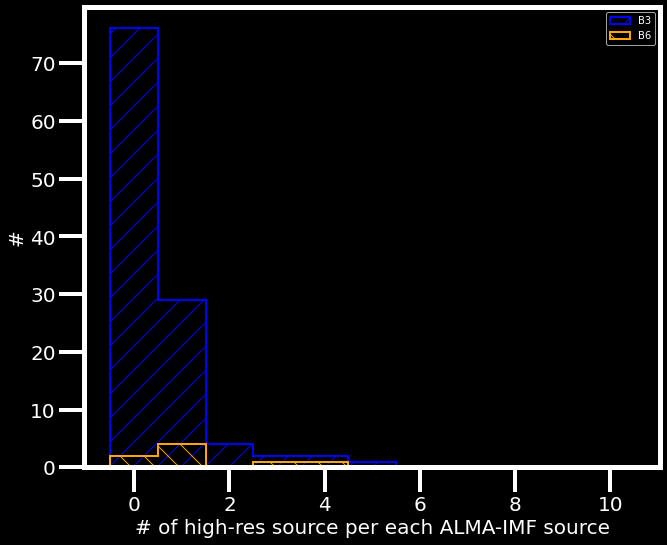

In [26]:

hdrNBalmaimf = fits.getheader(w51n_b3_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits',format='fits')
xsky = catalog['b6_xsky'] ; ysky = catalog['b6_ysky']
negativeind = np.where(xsky<0)
xsky[negativeind] = catalog['b3_xsky'][negativeind] 
ysky[negativeind] = catalog['b3_ysky'][negativeind] 

xysource_sky= np.vstack((xsky, ysky)).T

fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0) 

wcsNB = WCS(hdrNB,naxis=2)
xysource = wcsNB.wcs_world2pix(xysource_sky,0)

multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=False 
                          ,color='cyan',lw=2,legendlabel='B3')
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=False 
                          ,color='cyan',lw=2,label=[1,6,2,41,5,7,68,25],hatch='\\',histcolor='orange',legendlabel='B6')
ax1.legend()


### w51n (sources inside FoV)

[[ 8251.99244447  7016.85617248]
 [ 8099.42111902  7129.99916871]
 [ 7026.8497253   7168.2858607 ]
 [ 7629.13549426  7228.2853117 ]
 [ 7825.70696451  7273.99941823]
 [ 7489.70697596  7286.57115307]
 [ 7603.42127054  7296.28533514]
 [ 7648.5641079   7274.57100827]
 [ 7763.42125546  7279.71376072]
 [ 7341.70698847  7300.2855737 ]
 [ 7145.13557761  7319.71432431]
 [ 7181.13556249  7303.14286293]
 [ 7551.99271162  7309.99966774]
 [ 7113.1355703   7311.71435348]
 [ 7781.70701871  7333.42802977]
 [ 7082.27846496  7352.85723876]
 [ 7046.27845661  7343.71441443]
 [ 7046.84989976  7359.7144139 ]
 [ 7006.27847329  7362.00016516]
 [ 7271.42133563  7367.71420919]
 [ 7253.70708794  7409.42851105]
 [ 5416.99999999  5198.99999999]
 [ 6973.99999998  6859.        ]
 [ 7650.00000001  7251.        ]
 [ 7183.00000001  7333.        ]
 [ 9821.00000001  7570.        ]
 [ 6011.00000001  7605.        ]
 [ 5317.99999999  7617.        ]
 [ 6488.56402248  7180.8577799 ]
 [ 7638.27839935  7280.85673193]
 [ 7279.42

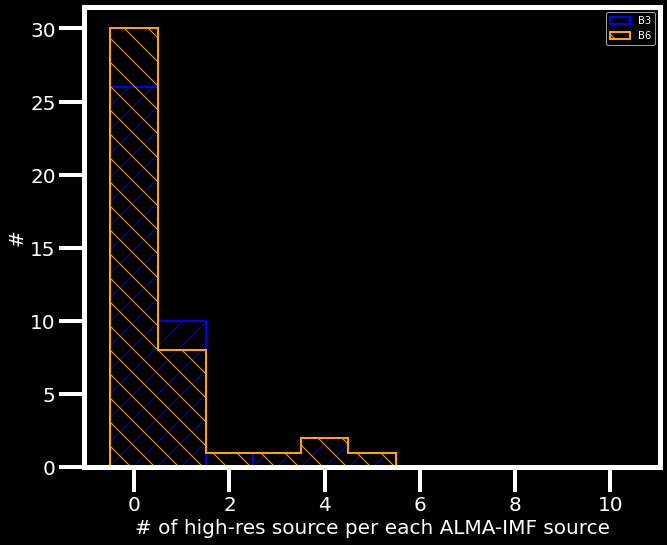

In [27]:

fitsdata = fits.open(w51n_b6_calibrated_pbcor)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51n_b6_calibrated_pbcor)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysky = np.vstack((sky_ra, sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
def count_source_in_image(image, xpix, ypix, kind='center'):
    nsource = len(xpix)
    isinside = []
    if kind is 'center':
        for i in range(nsource):
            if xpix[i] > image.shape[0] or ypix[i] > image.shape[1]:
                continue
            if np.isfinite(image[int(xpix[i]),int(ypix[i])]):
                isinside.append(i)
    
    return isinside
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])
    
hdrNBalmaimf = fits.getheader(w51n_b3_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])

fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
xysource = wcsNB.wcs_world2pix(xysource_sky,0)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 

#skylim1 = wcsNB.pixel_to_world(6500,6750)
#skylim2 = wcsNB.pixel_to_world(6500+0.35/scaleNB_phy.value,6750+0.2/scaleNB_phy.value)
#print('ho',skylim1)
#print(skylim1[0])
#limitarea = [float(skylim1),float(skylim1[1]),float(skylim2[0]),float(skylim2[1])]
nonzeroind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=False, label=ind_inside_b6image
                          ,color='cyan',lw=2,legendlabel='B3',return_nonzero_ind=True)
print(nonzeroind)
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

nonzeroind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=False
                          ,color='cyan',lw=2,hatch='\\',histcolor='orange',legendlabel='B6',label=ind_inside_b6image,return_nonzero_ind=True)
ax1.legend()
print(nonzeroind)


### w51n (sources inside FoV + recommneded criteria)

[[ 8251.99244447  7016.85617248]
 [ 8099.42111902  7129.99916871]
 [ 7026.8497253   7168.2858607 ]
 [ 7629.13549426  7228.2853117 ]
 [ 7825.70696451  7273.99941823]
 [ 7489.70697596  7286.57115307]
 [ 7603.42127054  7296.28533514]
 [ 7648.5641079   7274.57100827]
 [ 7763.42125546  7279.71376072]
 [ 7341.70698847  7300.2855737 ]
 [ 7145.13557761  7319.71432431]
 [ 7181.13556249  7303.14286293]
 [ 7551.99271162  7309.99966774]
 [ 7113.1355703   7311.71435348]
 [ 7781.70701871  7333.42802977]
 [ 7082.27846496  7352.85723876]
 [ 7046.27845661  7343.71441443]
 [ 7046.84989976  7359.7144139 ]
 [ 7006.27847329  7362.00016516]
 [ 7271.42133563  7367.71420919]
 [ 7253.70708794  7409.42851105]
 [ 5416.99999999  5198.99999999]
 [ 6973.99999998  6859.        ]
 [ 7650.00000001  7251.        ]
 [ 7183.00000001  7333.        ]
 [ 9821.00000001  7570.        ]
 [ 6011.00000001  7605.        ]
 [ 5317.99999999  7617.        ]
 [ 6488.56402248  7180.8577799 ]
 [ 7638.27839935  7280.85673193]
 [ 7279.42

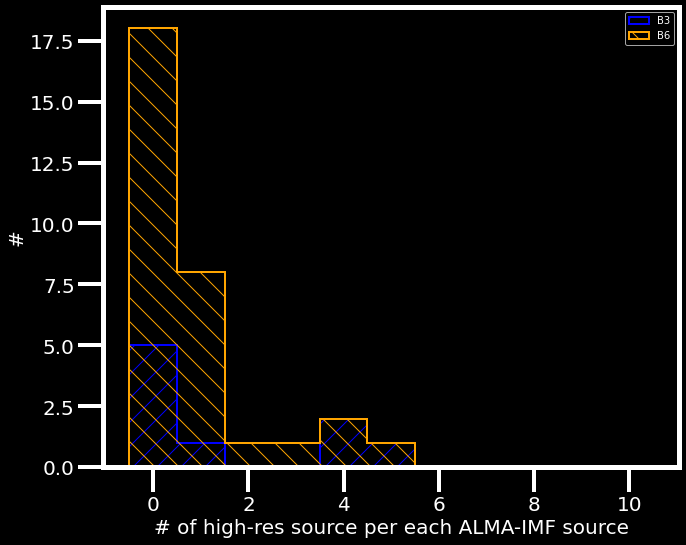

In [28]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
#catalog = Table.read('../spectral_index/w51n_combined_catalog.fits',format='fits')
#xysource = np.vstack((catalog['x_pix'],catalog['y_pix'])).T

#fitsdata = fits.open(w51n_b3_tt0)
#hdrNB = fits.getheader(w51n_b3_tt0)  
#wcsNB = WCS(hdrNB,naxis=2)
#scaleNB = wcsNB.proj_plane_pixel_scales()[0]
#scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 
#xysource = wcsNB.wcs_world2pix(xysource_sky,0)

#skylim1 = wcsNB.pixel_to_world(6500,6750)
#skylim2 = wcsNB.pixel_to_world(6500+0.35/scaleNB_phy.value,6750+0.2/scaleNB_phy.value)
#print('ho',skylim1)
#print(skylim1[0])
#limitarea = [float(skylim1),float(skylim1[1]),float(skylim2[0]),float(skylim2[1])]
nonzeroind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,color='cyan',lw=2,legendlabel='B3',return_nonzero_ind=True)
print(nonzeroind)
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

nonzeroind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=True
                          ,color='cyan',lw=2,hatch='\\',histcolor='orange',legendlabel='B6',label=ind_inside_b6image,return_nonzero_ind=True)
ax1.legend()




### w51e (Fov)

[ 0  1  2  3  4  5  6  7  8  9 11 12 13 16 18 22 24 26 27 31 35]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 25
 27 28 29 30 32]
hoh 25
[[ 7565.42862122  5090.57142343]
 [ 7500.28576406  5115.14285202]
 [ 7542.00004978  5116.85713771]
 [ 7495.71433549  5137.99999485]
 [ 7601.42862122  5362.57142344]
 [ 7436.28576408  5359.14285201]
 [ 7422.00004978  5372.28570915]
 [ 8087.71433549  5426.57142343]
 [ 7547.14290693  5499.14285202]
 [ 7487.14290692  5506.57142343]
 [ 7513.42862122  5513.99999486]
 [ 7439.71433551  5648.28570915]
 [ 7424.85719263  5650.57142344]
 [ 7415.14290694  5903.142852  ]
 [ 7027.14290693  5919.71428058]
 [ 7425.42862122  5919.71428059]
 [ 6871.71433551  5924.28570915]
 [ 7017.42862121  5929.4285663 ]
 [ 7363.7143355   5969.99999486]
 [ 7078.57147837  5979.71428057]
 [ 7103.14290694  6040.85713772]
 [ 7340.28576407  6049.42856628]
 [ 7388.28576405  6084.28570915]
 [ 6990.00004977  6096.28570915]
 [ 7367.14290693  6092.28570916]
 [ 7354.00004

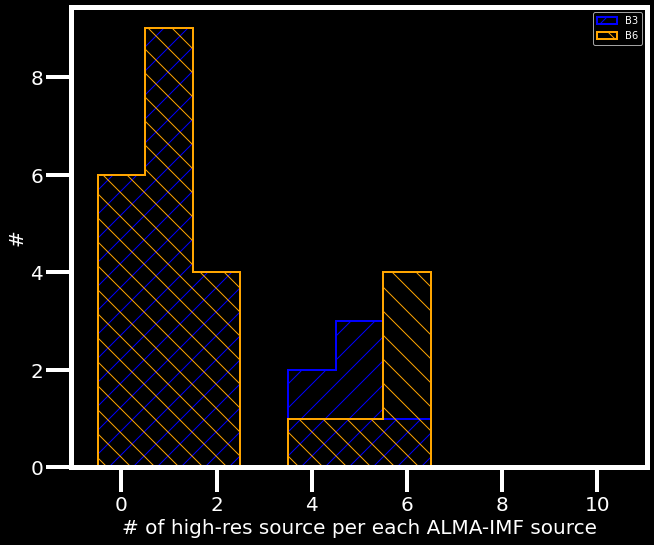

In [29]:
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
catdata_w51n = ascii.read(cat_w51e,data_start=0,format='commented_header', header_start=120,  comment="!")
sky_ra = catdata_w51n['WCS_ACOOR']
sky_dec = catdata_w51n['WCS_DCOOR']
pix_x = catdata_w51n['XCO_P']
pix_y = catdata_w51n['YCO_P']

afwhm_b6 = catdata_w51n['AFWHM02']
bfwhm_b6 = catdata_w51n['BFWHM02']

asize_b6 = catdata_w51n['ASIZE02']
bsize_b6 = catdata_w51n['BSIZE02']

theta_b6 = catdata_w51n['THETA02']

afwhm_b3 = catdata_w51n['AFWHM03']
bfwhm_b3 = catdata_w51n['BFWHM03']

asize_b3 = catdata_w51n['ASIZE03']
bsize_b3 = catdata_w51n['BSIZE03']

theta_b3 = catdata_w51n['THETA03']

no = catdata_w51n['NO']

rec_ind_b3 = np.where((np.abs(catdata_w51n['GOODM03'])>1)&
                   (np.abs(catdata_w51n['SIGNM03'])>1)&
                   (catdata_w51n['FXP_BST03']/catdata_w51n['FXP_ERR03']>2)&
                   (catdata_w51n['FXT_BST03']/catdata_w51n['FXT_ERR03']>2)&
                   (catdata_w51n['AFWHM03']/catdata_w51n['BFWHM03']<2)&
                   (catdata_w51n['FOOA03']/catdata_w51n['AFWHM03']>1.15))[0]

rec_ind_b6 = np.where((np.abs(catdata_w51n['GOODM02'])>1)&
                   (np.abs(catdata_w51n['SIGNM02'])>1)&
                   (catdata_w51n['FXP_BST02']/catdata_w51n['FXP_ERR02']>2)&
                   (catdata_w51n['FXT_BST02']/catdata_w51n['FXT_ERR02']>2)&
                   (catdata_w51n['AFWHM02']/catdata_w51n['BFWHM02']<2)&
                   (catdata_w51n['FOOA02']/catdata_w51n['AFWHM02']>1.15))[0]
print(rec_ind_b3)
print(rec_ind_b6)



skypos = np.vstack((sky_ra,sky_dec)).T


manualindex =[1,6,3,5,8,68]
manualindex =[0,5,2,4,7,67]
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'

fitsdata = fits.open(w51e_b6_calibrated_pbcor)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51e_b6_calibrated_pbcor)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysky = np.vstack((sky_ra, sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)

ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])
print('hoh',len(ind_inside_b6image))
hdrNBalmaimf = fits.getheader(w51e_b3_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits',format='fits')
xsky = catalog['b6_xsky'] ; ysky = catalog['b6_ysky']
negativeind = np.where(xsky<0)
xsky[negativeind] = catalog['b3_xsky'][negativeind] 
ysky[negativeind] = catalog['b3_ysky'][negativeind] 

xysource_sky= np.vstack((xsky, ysky)).T
fitsdata = fits.open(w51e2_b3_tt0)
hdrNB = fits.getheader(w51e2_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 
xysource = wcsNB.wcs_world2pix(xysource_sky,0)

#skylim1 = wcsNB.pixel_to_world(6500,6750)
#skylim2 = wcsNB.pixel_to_world(6500+0.35/scaleNB_phy.value,6750+0.2/scaleNB_phy.value)
#print('ho',skylim1)
#print(skylim1[0])
#limitarea = [float(skylim1),float(skylim1[1]),float(skylim2[0]),float(skylim2[1])]
ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=True,beam=beamalmaimf,use_criteria=False, label=ind_inside_b6image
                          ,color='cyan',lw=2,legendlabel='B3',return_nonzero_ind=True)
print(ind)
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=False,beam=beamalmaimf,use_criteria=False
                          ,color='cyan',lw=2,hatch='\\',histcolor='orange',legendlabel='B6',label=ind_inside_b6image,return_nonzero_ind=True)
ax1.legend()
print(ind)

### w51e (FoV + recommended criteria)

[[ 7565.42862122  5090.57142343]
 [ 7500.28576406  5115.14285202]
 [ 7542.00004978  5116.85713771]
 [ 7495.71433549  5137.99999485]
 [ 7601.42862122  5362.57142344]
 [ 7436.28576408  5359.14285201]
 [ 7422.00004978  5372.28570915]
 [ 8087.71433549  5426.57142343]
 [ 7547.14290693  5499.14285202]
 [ 7487.14290692  5506.57142343]
 [ 7513.42862122  5513.99999486]
 [ 7439.71433551  5648.28570915]
 [ 7424.85719263  5650.57142344]
 [ 7415.14290694  5903.142852  ]
 [ 7027.14290693  5919.71428058]
 [ 7425.42862122  5919.71428059]
 [ 6871.71433551  5924.28570915]
 [ 7017.42862121  5929.4285663 ]
 [ 7363.7143355   5969.99999486]
 [ 7078.57147837  5979.71428057]
 [ 7103.14290694  6040.85713772]
 [ 7340.28576407  6049.42856628]
 [ 7388.28576405  6084.28570915]
 [ 6990.00004977  6096.28570915]
 [ 7367.14290693  6092.28570916]
 [ 7354.00004979  6101.99999487]
 [ 7324.28576405  6123.14285202]
 [ 6996.28576408  6187.71428058]
 [ 7356.85719264  6197.99999486]
 [ 7284.28576406  6207.71428057]
 [ 7271.71

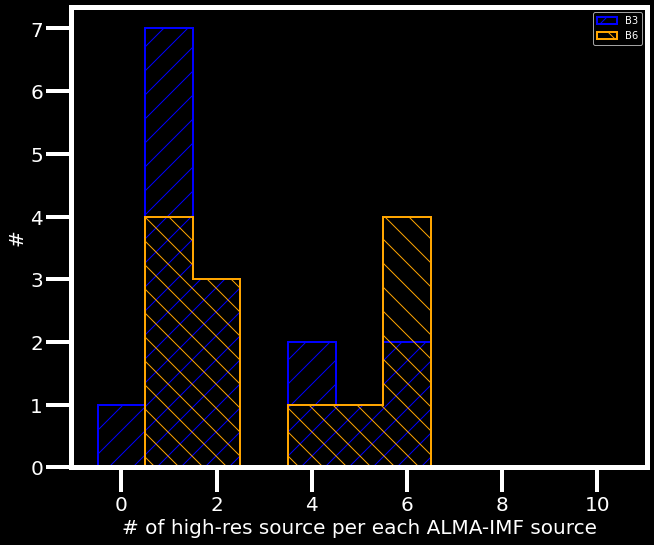

In [30]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
#catalog = Table.read('../spectral_index/w51e_combined_catalog.fits',format='fits')
#xysource = np.vstack((catalog['x_pix'],catalog['y_pix'])).T
fitsdata = fits.open(w51e2_b3_tt0)
hdrNB = fits.getheader(w51e2_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 

#skylim1 = wcsNB.pixel_to_world(6500,6750)
#skylim2 = wcsNB.pixel_to_world(6500+0.35/scaleNB_phy.value,6750+0.2/scaleNB_phy.value)
#print('ho',skylim1)
#print(skylim1[0])
#limitarea = [float(skylim1),float(skylim1[1]),float(skylim2[0]),float(skylim2[1])]
ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,color='cyan',lw=2,legendlabel='B3',return_nonzero_ind=True)
print(ind)
hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  

ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=False,beam=beamalmaimf,use_criteria=True
                          ,color='cyan',lw=2,hatch='\\',histcolor='orange',legendlabel='B6',label=ind_inside_b6image,return_nonzero_ind=True)
ax1.legend()
print(ind)

1 7251.4230863790235 7232.440001015562 204.52904356423295 194.3040435642319 161.81 1
2 7052.157885873308 7230.640099202146 262.65404356423875 186.9040435642312 1.5 1
4 7294.204029833571 5645.290006153144 239.4290435642364 197.10404356423223 173.033 6
5 7375.408160698974 7588.6600404568835 245.90404356423704 203.3540435642328 48.400000000000006 5
8 7181.545389419509 7736.980012746184 309.6290435642435 229.77904356423548 12.699999999999989 6
10 7697.010258067981 4184.590504192053 222.22904356423467 201.2790435642326 108.22 4
12 6962.762403067372 6814.03020802704 291.92904356424174 275.02904356424 9.800000000000011 2
13 7694.746310652403 3532.7205005587493 213.2290435642338 189.77904356423144 129.86 4
14 7556.027128875308 7713.400235995372 227.72904356423524 204.47904356423294 53.599999999999994 2
19 7447.6373084869765 8687.740098827067 239.2290435642364 182.3040435642307 73.3 1
23 7562.741205412306 4450.900247800648 213.2290435642338 197.0040435642322 146.68 2
25 7869.007344367254 3928.6

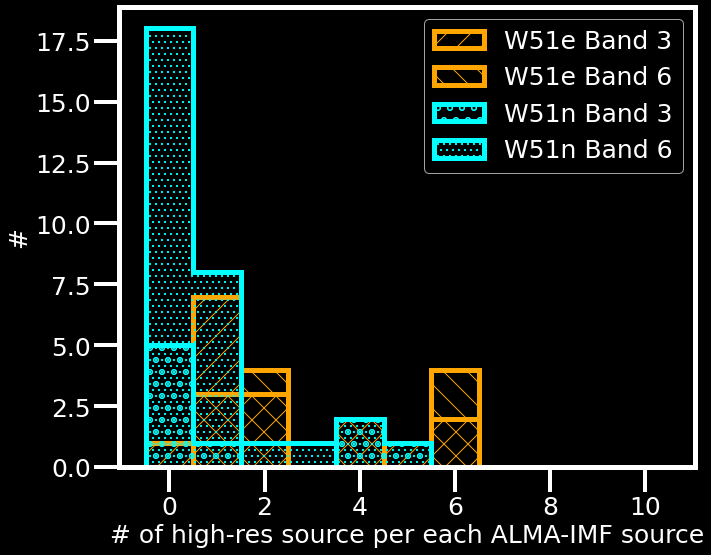

In [144]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
plt.style.use('dark_background')
mpl.rcParams['xtick.major.size'] = 25
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 15
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 25
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 15
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth']=5


        
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits',format='fits')
xsky = catalog['b6_xsky'] ; ysky = catalog['b6_ysky']
negativeind = np.where(xsky<0)
xsky[negativeind] = catalog['b3_xsky'][negativeind] 
ysky[negativeind] = catalog['b3_ysky'][negativeind] 

xysky= np.vstack((xsky, ysky)).T

fitsdata = fits.open(w51e2_b3_tt0)
hdrNB = fits.getheader(w51e2_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51e_b6_calibrated_pbcor)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51e_b6_calibrated_pbcor)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysource = wcsNBb6.wcs_world2pix(xysky,0)

almaimfcatalog = catdata(cat_w51e)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])

ind = multiplicity(ax1,hdrNBb6,cat_w51e,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,histcolor='orange',lw=5,legendlabel='W51e Band 3',return_nonzero_ind=True)

ind = multiplicity(ax1,hdrNBb6,cat_w51e,xysource,isb3=False,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,histcolor='orange',lw=5,legendlabel='W51e Band 6',return_nonzero_ind=True,hatch='\\')



catalog = Table.read('/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits',format='fits')
xsky = catalog['b6_xsky'] ; ysky = catalog['b6_ysky']
negativeind = np.where(xsky<0)
xsky[negativeind] = catalog['b3_xsky'][negativeind] 
ysky[negativeind] = catalog['b3_ysky'][negativeind] 

xysky= np.vstack((xsky, ysky)).T

fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51n_b6_calibrated_pbcor)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51n_b6_calibrated_pbcor)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysource = wcsNBb6.wcs_world2pix(xysky,0)

almaimfcatalog = catdata(cat_w51n)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])



ind = multiplicity(ax1,hdrNBb6,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                         ,lw=5,legendlabel='W51n Band 3',return_nonzero_ind=True, histcolor='cyan',hatch='o')

ind = multiplicity(ax1,hdrNBb6,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,lw=5,legendlabel='W51n Band 6',return_nonzero_ind=True,histcolor='cyan',hatch='..')

plt.legend(fontsize=25)


1 7251.4230863790235 7232.440001015562 298.3889973163901 199.06399731638015 0.0 2
2 7052.157885873308 7230.640099202146 315.13899731639174 203.0139973163805 2.5999999999999943 1
4 7294.204029833571 5645.290006153144 251.13899731638534 220.18899731638226 173.601 6
5 7375.408160698974 7588.6600404568835 293.63899731638963 229.46399731638317 50.30000000000001 6
8 7181.545389419509 7736.980012746184 305.13899731639077 215.11399731638173 13.099999999999994 6
10 7697.010258067981 4184.590504192053 209.88899731638125 200.01399731638023 99.65 4
12 6962.762403067372 6814.03020802704 262.0889973163865 241.6889973163844 26.80000000000001 2
13 7694.746310652403 3532.7205005587493 231.9889973163834 207.788997316381 153.36 4
14 7556.027128875308 7713.400235995372 201.7639973163804 190.98899731637934 6.199999999999989 2
15 8515.844494944256 7562.924021911875 269.0139973163872 238.4389973163841 154.34 2
16 7427.687885742777 5222.290080749133 265.03899731638677 159.18899731637617 158.57999999999998 6
1

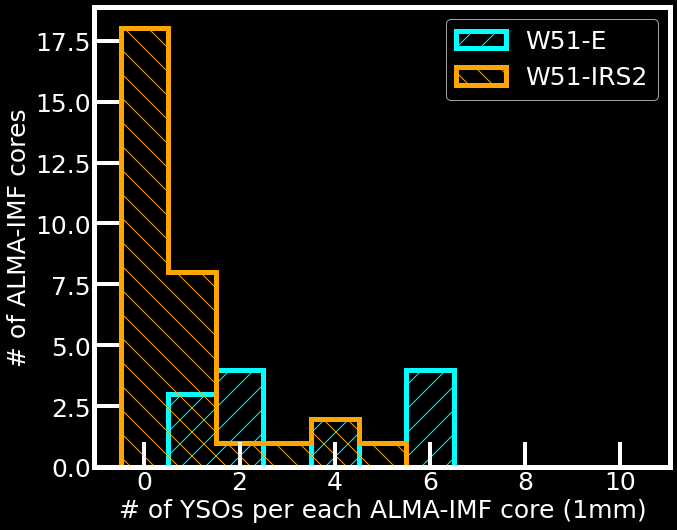

In [145]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
plt.style.use('dark_background')
mpl.rcParams['xtick.major.size'] = 25
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 15
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 25
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 15
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth']=5


fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits',format='fits')
xsky = catalog['b6_xsky'] ; ysky = catalog['b6_ysky']
negativeind = np.where(xsky<0)
xsky[negativeind] = catalog['b3_xsky'][negativeind] 
ysky[negativeind] = catalog['b3_ysky'][negativeind] 
xysky= np.vstack((xsky, ysky)).T

#xysky = np.vstack((catalog['x_sky'],catalog['y_sky'])).T
fitsdata = fits.open(w51e2_b3_tt0)
hdrNB = fits.getheader(w51e2_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51e_b6_calibrated_pbcor)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51e_b6_calibrated_pbcor)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysource = wcsNBb6.wcs_world2pix(xysky,0)

almaimfcatalog = catdata(cat_w51e)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])

#ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
#                          ,histcolor='orange',lw=5,legendlabel='W51e Band 3',return_nonzero_ind=True)
hdrNBalmaimf = fits.getheader(w51e_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  


ind_w51e_almaimf = multiplicity(ax1,hdrNBb6,cat_w51e,xysource,isb3=False,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,histcolor='cyan',lw=5,legendlabel='W51-E',return_nonzero_ind=True)

#w51e_almaimf_fragments = ind[3]
catalog = Table.read('/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits',format='fits')
xsky = catalog['b6_xsky'] ; ysky = catalog['b6_ysky']
negativeind = np.where(xsky<0)
xsky[negativeind] = catalog['b3_xsky'][negativeind] 
ysky[negativeind] = catalog['b3_ysky'][negativeind] 
xysky= np.vstack((xsky, ysky)).T

fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51n_b6_calibrated_pbcor)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51n_b6_calibrated_pbcor)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysource = wcsNBb6.wcs_world2pix(xysky,0)

almaimfcatalog = catdata(cat_w51n)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])

hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  


#ind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
#                         ,lw=5,legendlabel='W51n Band 3',return_nonzero_ind=True, histcolor='cyan',hatch='o')

ind_w51n_almaimf = multiplicity(ax1,hdrNBb6,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
                          ,lw=5,legendlabel='W51-IRS2',return_nonzero_ind=True,histcolor='orange',hatch='\\')
#w51n_almaimf_fragments = ind[3]

ax1.set_xlabel('# of YSOs per each ALMA-IMF core (1mm)')
ax1.set_ylabel('# of ALMA-IMF cores')
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
plt.legend(fontsize=25)


ho [1.171, 2.856, 1.238, 0.485, 0.3071, 0.06159, 0.08442, 0.05473, 0.06794, 0.03131, 0.07018, 0.01639, 0.01502] [0.0174, 0.01826, 0.04055, 0.0147, 0.01699, 0.01053, 0.008063, 0.01082, 0.01124, 0.002402, 0.03089, 0.002846, 0.003057]
ho [1.816, 0.4895, 0.3616, 0.505, 0.204, 0.05237, 0.1256, 0.01679, 0.03136, 0.09075, 0.002988, 0.09, 0.02572, 0.008327, 0.01043, 0.005148, 0.04795, 0.002275, 0.002705, 0.02034, 0.01208, 0.007059, 0.009255, 0.01435, 0.005828, 0.002437, 0.005603, 0.004529, 0.00266, 0.01453, 0.002469] [0.02146, 0.01277, 0.01315, 0.01348, 0.012, 0.002025, 0.01443, 0.000798, 0.002957, 0.01448, 0.0003501, 0.01283, 0.002352, 0.0006151, 0.0007145, 0.000436, 0.006306, 0.0001877, 0.0002059, 0.00323, 0.001676, 0.001616, 0.0009265, 0.0009938, 0.0005389, 0.0002876, 0.001156, 0.000864, 0.0003614, 0.001573, 0.0007152]
1.171 0.0174 [1025.44199055] [1054.14935317] 2
2.856 0.01826 [1012.15764444] [1054.02929438] 1
1.238 0.04055 [1028.29457394] [948.33936754] 6
0.485 0.0147 [1033.70754534] [10

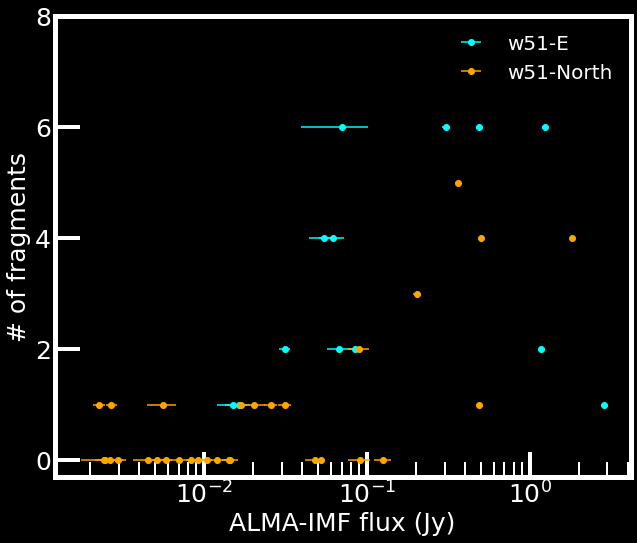

In [146]:
from astropy.coordinates import SkyCoord

def get_flux_from_almaimf(cat_w51e, ind_w51e_almaimf):
    w51e_almaimf_cat = catdata(cat_w51e, band='B6')
    w51e_almaimf_fragment_ind = ind_w51e_almaimf[3]
    fluxarr=[] ; fluxerrarr =[] ;xarr=[] ; yarr=[]
    for i in range(len(w51e_almaimf_fragment_ind)):
        matchind = np.where(w51e_almaimf_cat.no==w51e_almaimf_fragment_ind[i])[0]
        fluxarr.append(w51e_almaimf_cat.flux[matchind].value.item())
        fluxerrarr.append(w51e_almaimf_cat.fluxerr[matchind].value.item())
        #ra = w51e_almaimf_cat.sky_ra[matchind]
        #dec = w51e_almaimf_cat.sky_dec[matchind]
        #sky = np.vstack((ra,dec)).T
        #xypix = wcs.world_to_pixel(SkyCoord(ra,dec, unit='deg'))
        
        #xarr.append(xypix[0])
        #yarr.append(xypix[1])
        #xarr.append(w51e_almaimf_cat.pix_x[i])
        #yarr.append(w51e_almaimf_cat.pix_y[i])
    print('ho',fluxarr, fluxerrarr)
    
    #return fluxarr, fluxerrarr,xarr,yarr
    return fluxarr, fluxerrarr
#hdrNB = fits.getheader(w51e_b6_almaimf)  
#wcs_w51e_b6_almaimf= WCS(hdrNB,naxis=2)
w51e_flux, w51e_fluxerr = get_flux_from_almaimf(cat_w51e, ind_w51e_almaimf)
#hdrNB = fits.getheader(w51n_b6_almaimf)  
#wcs_w51n_b6_almaimf= WCS(hdrNB,naxis=2)
w51n_flux, w51n_fluxerr = get_flux_from_almaimf(cat_w51n, ind_w51n_almaimf)
for i in range(len(w51e_flux)):
    print(w51e_flux[i], w51e_fluxerr[i], w51e_xarr[i], w51e_yarr[i], ind_w51e_almaimf[4][i])

fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
ax1.errorbar(w51e_flux, ind_w51e_almaimf[4], xerr=w51e_fluxerr,label='w51-E',marker='o',fmt='.',c='cyan')
ax1.errorbar(w51n_flux, ind_w51n_almaimf[4], xerr=w51n_fluxerr,label='w51-North',marker='o',fmt='.',c='orange')
ax1.set_ylabel('# of fragments')
ax1.set_xlabel(r'ALMA-IMF flux (Jy)')
ax1.set_xscale('log')
ax1.set_yticks([0,2,4,6,8])
#ax2 = ax1.twinx()
#ax1.set_ylim(ylim1, ylim2)
#ax2.set_ylim(0.001,10)
#ax2.set_yscale('log')
#new_tick_locations = [1e-3,1e-2,1e-1,1,10]
#ax2.set_yticks(new_tick_locations)
#ax2.set_ylabel('flux (Jy)')
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
#ax2.tick_params(axis="y",direction='in')
#ax2.tick_params(axis="x",direction='in')
ax1.tick_params(axis="y",direction='in',which='minor')
ax1.tick_params(axis="x",direction='in',which='minor')
#ax2.tick_params(axis="y",direction='in',which='minor')
#ax2.tick_params(axis="x",direction='in',which='minor')
ax1.legend(frameon=False,fontsize=20)
#ax1.set_xlim(1e-4, 10)
#ax1.set_ylim(-1,9)

1 7251.4230863790235 7232.440001015562 298.3889973163901 199.06399731638015 0.0 2
2 7052.157885873308 7230.640099202146 315.13899731639174 203.0139973163805 2.5999999999999943 1
3 14656.964115015864 12779.637665652988 203.86399731638062 176.58899731637788 18.400000000000006 1
4 7294.204029833571 5645.290006153144 251.13899731638534 220.18899731638226 173.601 6
5 7375.408160698974 7588.6600404568835 293.63899731638963 229.46399731638317 50.30000000000001 6
6 -1013.4797183648443 -4689.238550540802 214.16399731638165 198.86399731638014 153.79 0
7 16049.484150867902 11536.254302465479 776.6389973164378 634.6389973164236 116.67 0
8 7181.545389419509 7736.980012746184 305.13899731639077 215.11399731638173 13.099999999999994 6
9 -1218.5917472500241 -4615.969940954028 253.9389973163856 215.58899731638178 167.34 0
10 7697.010258067981 4184.590504192053 209.88899731638125 200.01399731638023 99.65 4
11 16069.2381241172 2235.5651795733265 235.28899731638376 207.713997316381 160.07999999999998 1
12

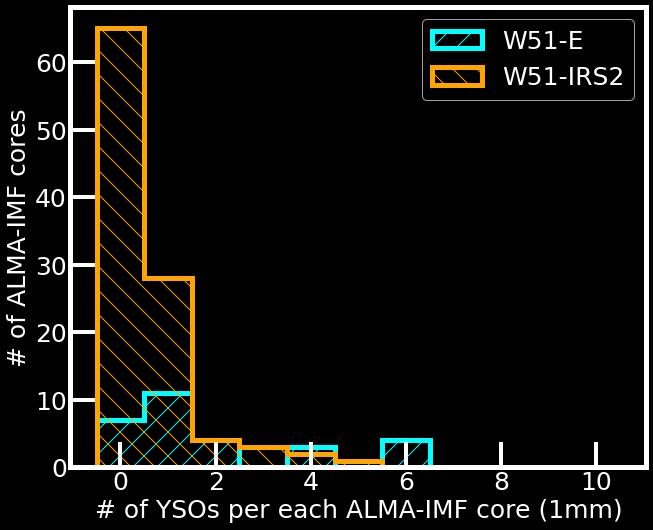

In [147]:

fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
catalog = Table.read('/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits',format='fits')
xsky = catalog['b6_xsky'] ; ysky = catalog['b6_ysky']
negativeind = np.where(xsky<0)
xsky[negativeind] = catalog['b3_xsky'][negativeind] 
ysky[negativeind] = catalog['b3_ysky'][negativeind] 
xysky= np.vstack((xsky, ysky)).T

#xysky = np.vstack((catalog['x_sky'],catalog['y_sky'])).T
fitsdata = fits.open(w51e2_b3_tt0)
hdrNB = fits.getheader(w51e2_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51e_b6_calibrated_pbcor)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51e_b6_calibrated_pbcor)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysource = wcsNBb6.wcs_world2pix(xysky,0)

almaimfcatalog = catdata(cat_w51e)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])

#ind = multiplicity(ax1,hdrNB,cat_w51e,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
#                          ,histcolor='orange',lw=5,legendlabel='W51e Band 3',return_nonzero_ind=True)
hdrNBalmaimf = fits.getheader(w51e_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  


ind_w51e_almaimf = multiplicity(ax1,hdrNBb6,cat_w51e,xysource,isb3=False,beam=beamalmaimf,use_criteria=True 
                          ,histcolor='cyan',lw=5,legendlabel='W51-E',return_nonzero_ind=True)

#w51e_almaimf_fragments = ind[3]
catalog = Table.read('/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits',format='fits')
xsky = catalog['b6_xsky'] ; ysky = catalog['b6_ysky']
negativeind = np.where(xsky<0)
xsky[negativeind] = catalog['b3_xsky'][negativeind] 
ysky[negativeind] = catalog['b3_ysky'][negativeind] 
xysky= np.vstack((xsky, ysky)).T

fitsdata = fits.open(w51n_b3_tt0)
hdrNB = fits.getheader(w51n_b3_tt0)  
wcsNB = WCS(hdrNB,naxis=2)
scaleNB = wcsNB.proj_plane_pixel_scales()[0]
scaleNB_phy = scaleNB * np.pi / 180 * 5.41e3 


fitsdata = fits.open(w51n_b6_calibrated_pbcor)
b6highresimage = fitsdata[0].data[0][0]
hdrNBb6 = fits.getheader(w51n_b6_calibrated_pbcor)
wcsNBb6 = WCS(hdrNBb6,naxis=2)
xysource = wcsNBb6.wcs_world2pix(xysky,0)

almaimfcatalog = catdata(cat_w51n)
xysky = np.vstack((almaimfcatalog.sky_ra, almaimfcatalog.sky_dec)).T
pixxy_b6 = wcsNBb6.wcs_world2pix(xysky,0)
ind_inside_b6image = count_source_in_image(b6highresimage, pixxy_b6[:,0], pixxy_b6[:,1])

hdrNBalmaimf = fits.getheader(w51n_b6_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)  


#ind = multiplicity(ax1,hdrNB,cat_w51n,xysource,isb3=True,beam=beamalmaimf,use_criteria=True, label=ind_inside_b6image
#                         ,lw=5,legendlabel='W51n Band 3',return_nonzero_ind=True, histcolor='cyan',hatch='o')

ind_w51n_almaimf = multiplicity(ax1,hdrNBb6,cat_w51n,xysource,isb3=False,beam=beamalmaimf,use_criteria=True, 
                          lw=5,legendlabel='W51-IRS2',return_nonzero_ind=True,histcolor='orange',hatch='\\')
#w51n_almaimf_fragments = ind[3]

ax1.set_xlabel('# of YSOs per each ALMA-IMF core (1mm)')
ax1.set_ylabel('# of ALMA-IMF cores')
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
plt.legend(fontsize=25)



ho [1.171, 2.856, 0.01213, 1.238, 0.485, 0.02439, 0.1438, 0.3071, 0.06197, 0.06159, 0.02129, 0.08442, 0.05473, 0.06794, 0.03131, 0.07018, 0.04665, 0.004261, 0.01639, 0.01476, 0.005021, 0.009237, 0.03191, 0.03728, 0.01502, 0.01764, 0.006736, 0.01812, 0.003933] [0.0174, 0.01826, 0.00135, 0.04055, 0.0147, 0.004302, 0.005526, 0.01699, 0.004907, 0.01053, 0.001034, 0.008063, 0.01082, 0.01124, 0.002402, 0.03089, 0.003698, 0.0002721, 0.002846, 0.001581, 0.0005585, 0.0008791, 0.001504, 0.002987, 0.003057, 0.002169, 0.001003, 0.002323, 0.0005246]
ho [1.816, 0.4895, 0.02392, 0.1936, 0.3616, 0.505, 0.204, 0.03643, 0.0354, 0.02527, 0.05237, 0.009011, 0.0382, 0.01905, 0.03651, 0.02477, 0.1256, 0.008967, 0.05871, 0.01645, 0.008186, 0.01679, 0.03136, 0.004807, 0.01202, 0.02125, 0.00867, 0.07465, 0.004485, 0.02021, 0.01682, 0.01395, 0.003238, 0.09075, 0.002988, 0.01698, 0.004618, 0.09, 0.02572, 0.007085, 0.005483, 0.01139, 0.006131, 0.008327, 0.01367, 0.01043, 0.006796, 0.005148, 0.003898, 0.007494, 0.

(-1.0, 9.0)

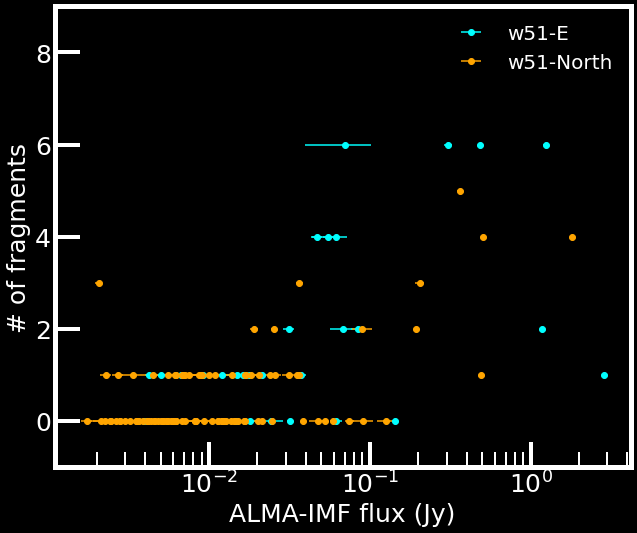

In [148]:
w51e_flux, w51e_fluxerr = get_flux_from_almaimf(cat_w51e, ind_w51e_almaimf)
w51n_flux, w51n_fluxerr = get_flux_from_almaimf(cat_w51n, ind_w51n_almaimf)
print(w51e_flux, w51e_fluxerr)
print(len(w51n_flux), len(ind_w51n_almaimf[0]),len(ind_w51n_almaimf[3]),len(ind_w51n_almaimf[3]))

fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
ax1.errorbar(w51e_flux, ind_w51e_almaimf[4], xerr=w51e_fluxerr,label='w51-E',marker='o',fmt='.',c='cyan')
ax1.errorbar(w51n_flux, ind_w51n_almaimf[4], xerr=w51n_fluxerr,label='w51-North',marker='o',fmt='.',c='orange')
ax1.set_ylabel('# of fragments')
ax1.set_xlabel(r'ALMA-IMF flux (Jy)')
ax1.set_xscale('log')
ax1.set_yticks([0,2,4,6,8])
#ax2 = ax1.twinx()
#ax1.set_ylim(ylim1, ylim2)
#ax2.set_ylim(0.001,10)
#ax2.set_yscale('log')
#new_tick_locations = [1e-3,1e-2,1e-1,1,10]
#ax2.set_yticks(new_tick_locations)
#ax2.set_ylabel('flux (Jy)')
ax1.tick_params(axis="y",direction='in')
ax1.tick_params(axis="x",direction='in')
#ax2.tick_params(axis="y",direction='in')
#ax2.tick_params(axis="x",direction='in')
ax1.tick_params(axis="y",direction='in',which='minor')
ax1.tick_params(axis="x",direction='in',which='minor')
#ax2.tick_params(axis="y",direction='in',which='minor')
#ax2.tick_params(axis="x",direction='in',which='minor')
ax1.legend(frameon=False,fontsize=20)
ax1.set_ylim(-1,9)

In [149]:
### w51 b6 (b6 detections only)

TypeError: multiplicity() got an unexpected keyword argument 'band'

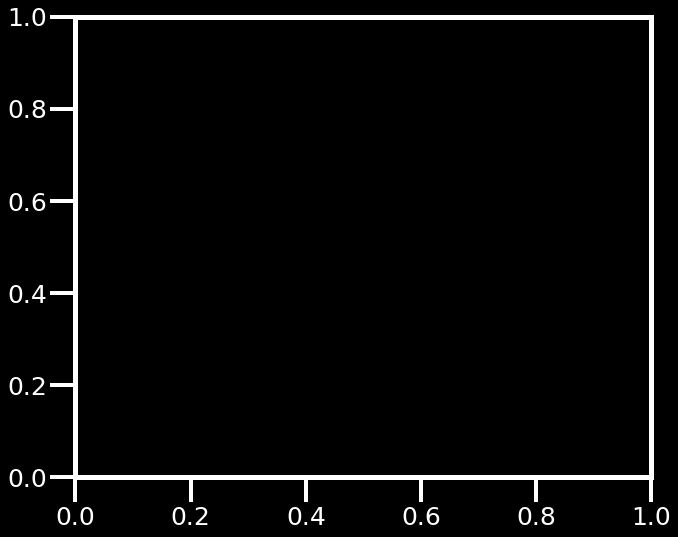

In [150]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])

multiplicity(ax1,w51n_b6_almaimf, w51n_b6_briggs,catdata_w51n, '/home/t.yoo/w51/catalogue/alpha/w51n_b6_catalog.fits',band='B6')
             




In [ ]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])

multiplicity(ax1,w51n_b6_almaimf, w51n_b6_briggs,catdata_w51n, '/home/t.yoo/w51/catalogue/alpha/w51n_combined_catalog.fits')
             
